<a href="https://colab.research.google.com/github/MaxBusha/CS-5324/blob/main/Machine_Learning_in_Python_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5328 Lab Assignment 1: Exploring Table Data

# 1. Business Understanding

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

Stroke Prediction data has 5109 observations and 11 features, including both numerical and categorical features. It matches the Lab One requirement and is free to download at kaggle.com. This dataset is commonly used and donated by Ahmad Hassan; however, there is no source listed for where the data was collected.

Through cleaning the dataset and visualizing its features and relationships through several methods we can ascertain an understanding of what the data suggests about predicting strokes based on the features recorded.

Through this analysis, health professionals can better understand what health benchmarks and metrics are correlated with stroke chances and can use this information to help patients. Additionally, patients and individuals can take these factors into account in their everyday lives to try and live healthier and avoid increasing the chance of stroke.

Overall the analytics help both doctors and individuals understand the warning signs of strokes that are found within biological metrics so that they can live more informed and healthier lives.

For our prediction model to be useful to third parties, the plots must be accurate. By cleaning up the dataset, the plots are able to demonstrate more accurately how certain factors impact the likelihood of having a stroke. This can help doctors gain a better understanding and aid their advising.

------------------------------------------------------

Dataset: Stroke Prediction Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Question Of Interest: Which individuals are most likekly to have a stroke?

#2.0 Data Understanding

- 2.1 Data Description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings("ignore")

#reading in of stroke/health dataset
url = 'https://raw.githubusercontent.com/MaxBusha/CS-5324/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

#usage of replace/inplace function to change categorical, mostly binary, data into integer values
#replace married information to 0 for 'No' and 1 for 'Yes'
df.ever_married.replace(to_replace = ['No', 'Yes'],
                 value = range(0,2), inplace = True)

#replace residence type to 0 for 'rural' and 1 for 'urban'
df.Residence_type.replace(to_replace = ['Rural', 'Urban'],
                 value = range(0,2), inplace = True)

#replace gender info  to 0 for 'male' and 1 for 'female'
df.gender.replace(to_replace = ['Male', 'Female'],
                 value = range(0,2), inplace = True)

#replace smoking info  to 0 for 'never smoked', 1 for 'formerly smoked', and 2 for 'smokes
# df.smoking_status.replace(to_replace = ['never smoked', 'formerly smoked', 'smokes', 'Unknown'],
#                  value = range(0,4), inplace = True)

df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [ ]:
# find the data type
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                0 non-null      float64 
 1   hypertension       0 non-null      float64 
 2   heart_disease      0 non-null      float64 
 3   work_type          0 non-null      object  
 4   avg_glucose_level  0 non-null      float64 
 5   bmi                0 non-null      float64 
 6   smoking_status     0 non-null      object  
 7   stroke             0 non-null      int64   
 8   age_group          0 non-null      category
 9   bmi_group          0 non-null      category
dtypes: category(2), float64(5), int64(1), object(2)
memory usage: 264.0+ bytes
None


Based on the dataframe information, there are some missing values found in the dataset as there are 5109 entries in each feature except for the bmi feature.

We will be using the KNN, K-nearest neighbor imputation method to solve this issue.


In [ ]:
# impute based upon the K closest samples (rows)
# our first introduction to sklearn!!!
from sklearn.impute import KNNImputer
import copy

# get object for imputation
knn_obj = KNNImputer(n_neighbors=3)

features_to_use = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi']

# create a numpy matrix from pandas numeric values to impute
temp = df[features_to_use].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp) # fit the object
temp_imputed = knn_obj.transform(temp) # transform all mssing data
#    could have also done:
# temp_imputed = knn_obj.fit_transform(temp)

# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
# otherwise both data frames will be manipulated
df_imputed = copy.deepcopy(df) # not just an alias
df_imputed[features_to_use] = temp_imputed
df_imputed.dropna(inplace=True)
df_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   float64
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   float64
 4   heart_disease      5109 non-null   float64
 5   ever_married       5109 non-null   float64
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   float64
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 479.1+ KB


The previous info() print shows that we have solved our previous issue with missing values.
Becuase of this we will be setting our dataframe equal to the imputed data so that we can utilize the benefits moving forward.

In [ ]:
#setting them equal and using a .info() print to confirm changes
df = df_imputed
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   float64
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   float64
 4   heart_disease      5109 non-null   float64
 5   ever_married       5109 non-null   float64
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   float64
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 479.1+ KB
None


In [ ]:
# properties of the imputer after fitting
print(knn_obj.n_features_in_)


8


In [ ]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,0.586025,43.229986,0.097475,0.054022,0.656293,0.508123,106.140399,28.932531,0.048738
std,21162.008804,0.492592,22.613575,0.296633,0.226084,0.474991,0.499983,45.285004,7.780808,0.215340
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.700000,0.000000
50%,36922.000000,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.880000,28.200000,0.000000
75%,54643.000000,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,33.100000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = df.columns
data_des['Description'] = ['unique ID for each entry', 'binary representing gender',  'age of individual represented',  'binary for recording hypertension',
                           'binary regarding history with heart disease', 'binary representing marriage history', 'string object representing work type',
                           'binary representing residence type',  'average glucose level of individual','recorded bmi of individual',
                           'string objet representing smoking history',  'binary representing stroke history']
data_des['Scales'] = ['ratio'] + ['norminal'] + ['ratio'] + ['norminal'] * 5 + ['ratio'] * 2 + ['ordinal'] + ['norminal']
data_des['Discrete\Continuous'] = ['continuous'] + ['discrete'] + ['continuous'] + ['discrete'] * 5 + ['continuous'] * 2 + ['discrete'] * 2
data_des['Range'] = ['67 - 72940'] + ["0:Male 1:Female"] + ['1 - 82'] + ['0:No 1:Yes'] + ['0:No 1:Yes'] + ['0:No 1:Yes'] + [repr(set(df.work_type))] + \
        ['0:Rural 1:Urban'] + ['55.1 - 271.7'] + ['10.3 - 97.6'] + [repr(set(df.smoking_status))] + ['0:No 1:Yes']

data_des

,Features,Description,Scales,Discrete\Continuous,Range
0,id,unique ID for each entry,ratio,continuous,67 - 72940
1,gender,binary representing gender,norminal,discrete,0:Male 1:Female
2,age,age of individual represented,ratio,continuous,1 - 82
3,hypertension,binary for recording hypertension,norminal,discrete,0:No 1:Yes
4,heart_disease,binary regarding history with heart disease,norminal,discrete,0:No 1:Yes
5,ever_married,binary representing marriage history,norminal,discrete,0:No 1:Yes
6,work_type,string object representing work type,norminal,discrete,"{'Private', 'children', 'Never_worked', 'Self-..."
7,Residence_type,binary representing residence type,norminal,discrete,0:Rural 1:Urban
8,avg_glucose_level,average glucose level of individual,ratio,continuous,55.1 - 271.7
9,bmi,recorded bmi of individual,ratio,continuous,10.3 - 97.6


The dataset description above describes the features that we will be making use of including the ranges of the variables and aspects such as them being continuous or discrete.

- 2.1 Data Quality




In [ ]:
# clean up dataset - remove unused columns
colsToRemove = ['id', 'gender', 'Residence_type', 'ever_married']
for col in colsToRemove:
  if col in df:
    del df[col]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5109 non-null   float64
 1   hypertension       5109 non-null   float64
 2   heart_disease      5109 non-null   float64
 3   work_type          5109 non-null   object 
 4   avg_glucose_level  5109 non-null   float64
 5   bmi                5109 non-null   float64
 6   smoking_status     5109 non-null   object 
 7   stroke             5109 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 319.4+ KB
None


# 3.0 Data Visualization

- 3.1 Data exploration

The first of the three graphs were done to get an understanding of some of the continuous variables concerning one another and in relation to some of the important discrete variables.

The first of which comparing our most important continuous variables is a bit hard to read but shows clear, and somewhat obvious, information about the spread of our data across age as relating to BMI and in relation to average glucose levels.

This graph, and the two following, helped us understand our dataset as a whole before we began looking for specifics.

Text(0.5, 1.0, 'Average Glucose Level by BMI and Age')

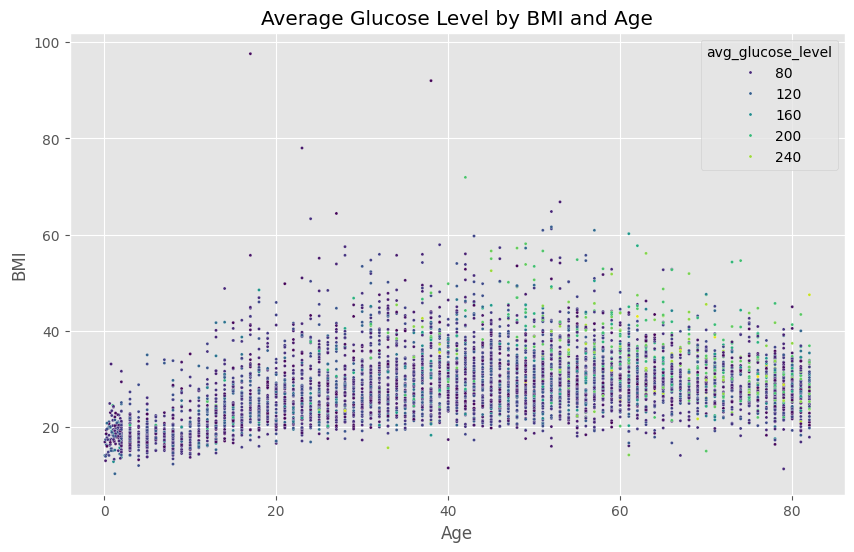

In [ ]:
# BMI & avg glucose lvl

plt.figure(figsize = (10, 6))
sns.scatterplot(x="age", y="bmi", hue="avg_glucose_level", data=df, s=5, palette = 'viridis')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Average Glucose Level by BMI and Age')

In a similar manner we utilized this graph to see how hypertension was distributed and saw that it had a higher occurrence rate among older individuals. The graph below the hypertension visualization has to do with general heart disease and has a similar, if not more sparse, distribution of positive instances of the what we were checking for, but again is useful in understanding how these important discrete variables were distributed by age and bmi throughout our dataset.

This would be a trend in most of the dataset as the age increased there tended to be a higher occurrence rate of all of the adverse health conditions that we had information on.

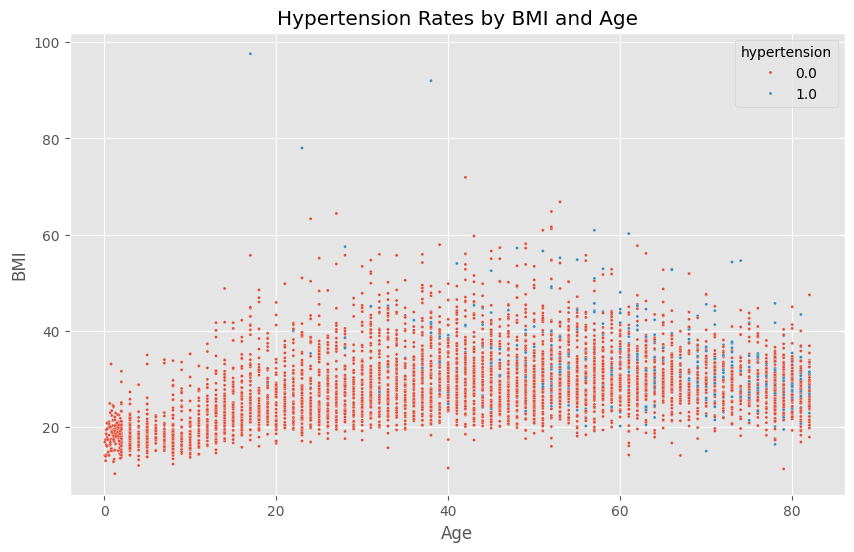

In [ ]:
# BMI & hypertension

plt.figure(figsize = (10, 6))
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Hypertension Rates by BMI and Age')
ax = sns.scatterplot(x="age", y="bmi", hue="hypertension", data=df, s=5)

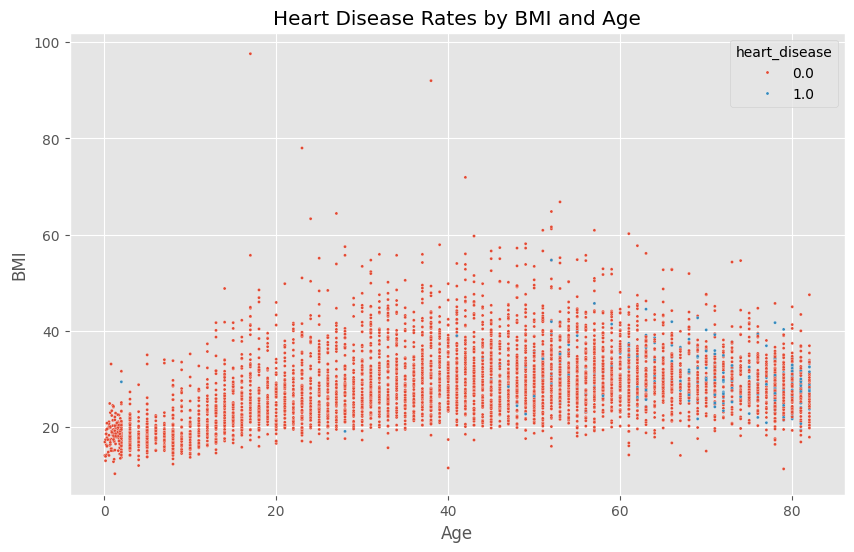

In [ ]:
# BMI & heart disease

plt.figure(figsize = (10, 6))
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Heart Disease Rates by BMI and Age')
ax = sns.scatterplot(x="age", y="bmi", hue="heart_disease", data=df, s=5)

In [ ]:
# aggregate by stroke & smoking status
groupedSmoke = df.groupby(by = 'smoking_status')

for val, grp in groupedSmoke:
  print(val, len(grp))

print('-----------------------------------------------')

print('Stroke rates for different smoking categories:')

print(groupedSmoke.stroke.sum() / groupedSmoke.stroke.count())

Unknown 1544
formerly smoked 884
never smoked 1892
smokes 789
-----------------------------------------------
Stroke rates for different smoking categories:
smoking_status
Unknown            0.030440
formerly smoked    0.079186
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64


We group by the smoking status of the entries and visualize the stroke rates along this parameter to understand how smoking might impact smoking rates as we understand smoking to be detrimental to ones health.

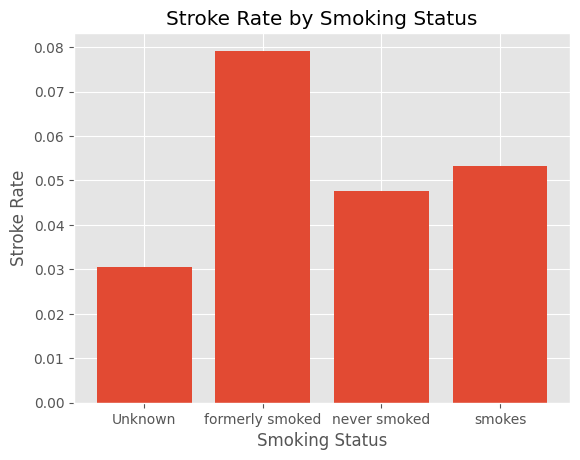

In [ ]:
plt.style.use('ggplot')

strokeRate = groupedSmoke.stroke.mean()

# utilized ChatGPT4 for this plotting method
plt.bar(strokeRate.index, strokeRate.values)
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rate by Smoking Status')
plt.show()

As expected we found that the highest stroke rates were found to be from individuals who either used to smoke or from those who currently smoke and that the lower rates are from individuals who never smoked. Interestingly the formerly smoking rates of stroke were higher than those of those who are currently actively smoking, we believe this is because older age could be correlated to having more chances to stop smoking and this could also lead to strokes happening later in life after individuals stop smoking.

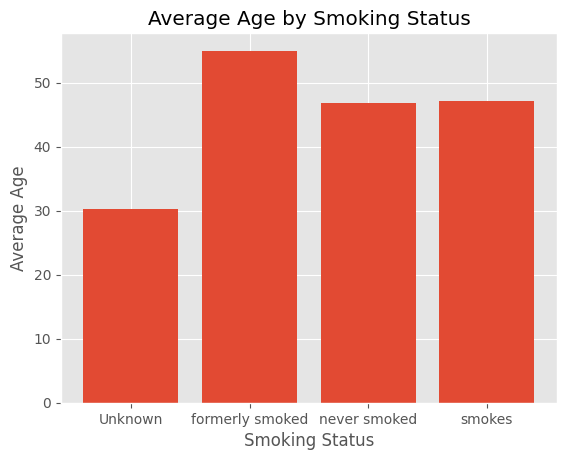

In [ ]:
plt.style.use('ggplot')

groupedSmoke = df.groupby(by = 'smoking_status')
strokeRate = groupedSmoke.age.mean()

# utilized ChatGPT4 for this plotting method
plt.bar(strokeRate.index, strokeRate.values)
plt.xlabel('Smoking Status')
plt.ylabel('Average Age')
plt.title('Average Age by Smoking Status')
plt.show()

Our idea relating age to formerly smoking individuals is supported by the above graph as we investigate average age by smoking subgroups.

Text(0.5, 1.0, 'Hist and KDE, 50 bins and 0.05 bw')

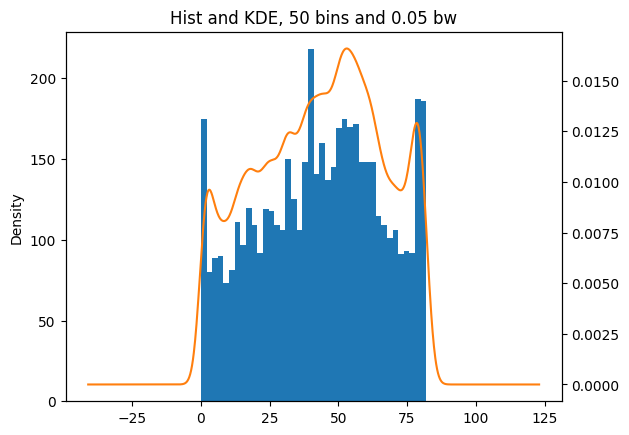

In [ ]:
# first - exploratory analysis of age distribution

df.age.plot.hist(bins=40)
df.age.plot.kde(bw_method=0.1, secondary_y=True)
plt.title('Hist and KDE, 50 bins and 0.05 bw')

We used this graph to do some analysis of the age distribution as the previous descriptions generated by the data frame were informative but lacked the ease of understanding provided by a graph such as this.

smoking_status
Unknown            0.033679
formerly smoked    0.135747
never smoked       0.122622
smokes             0.119138
Name: hypertension, dtype: float64


Text(0.5, 1.0, 'Hypertension Rates by Smoking Status and Age')

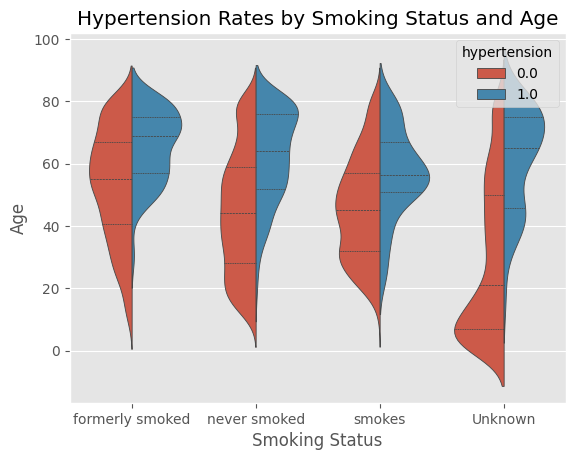

In [ ]:
# hypertension rates by different smoking categories & age
import seaborn as sns

print(groupedSmoke.hypertension.sum() / groupedSmoke.hypertension.count())

# via ChatGPT4
sns.violinplot(x="smoking_status", y="age", hue="hypertension", data=df, split=True, inner="quart")
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.title('Hypertension Rates by Smoking Status and Age')

This is one of our most informative graphs and combines both a dense level of information with good readability as it explains how age and smoking status relate to the development of hypertension in individuals.

It shows that age is as we previously found to be higher on average for the formerly smoked group with a more bell curve like distribution for never smoked and smokes groups. The unknown group being pretty evenly distributed.

While there is a skew towards more individuals who are older having hypertension, which would make sense as the older you are the more time you have had to develop such a condition. We can also see that individuals who have formerly smoked or who actively do have higher rates of hypertension as they age than the more evenly spread rates of the never-smoked group.

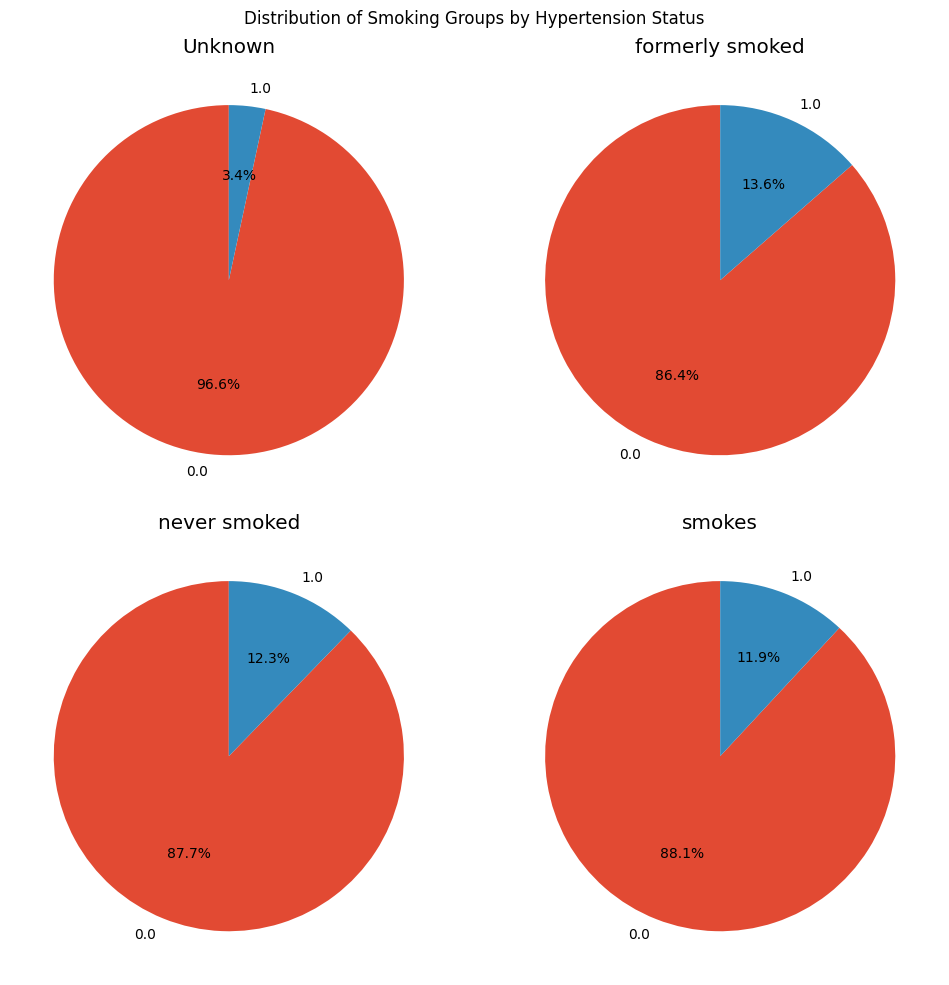

In [ ]:
entry_count = df.groupby(['smoking_status', 'hypertension']).size().unstack()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Create pie chart for each smoking category
for i, ax in enumerate(axes.flat):
    ax.pie(entry_count.iloc[i], labels=entry_count.columns, autopct='%1.1f%%', startangle=90)
    ax.set_title(entry_count.index[i])

plt.suptitle('Distribution of Smoking Groups by Hypertension Status')
plt.tight_layout()
plt.show()

Lastly, we used pie charts to get an understanding of percentages of hypertension as they relate to the smoking status. It shows that while formerly smoked has the highest percentage the second highest is form individuals who never smoked.

smoking_status
Unknown            0.031088
formerly smoked    0.087104
never smoked       0.047569
smokes             0.077313
Name: heart_disease, dtype: float64


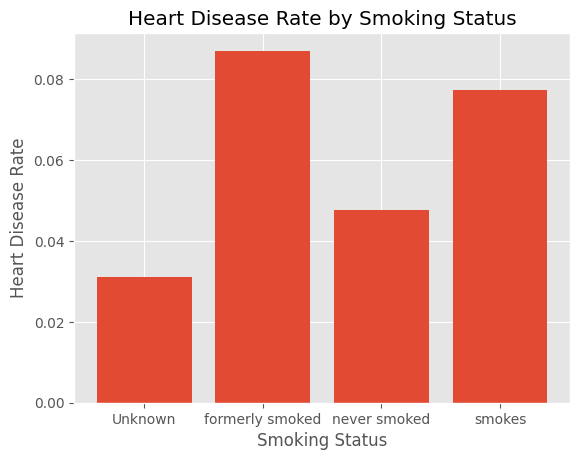

In [ ]:
# heart disease & smoking status
print(groupedSmoke.heart_disease.sum() / groupedSmoke.heart_disease.count())

heartDiseaseRate = groupedSmoke.heart_disease.mean()

plt.bar(heartDiseaseRate.index, heartDiseaseRate.values)
plt.xlabel('Smoking Status')
plt.ylabel('Heart Disease Rate')
plt.title('Heart Disease Rate by Smoking Status')
plt.show()

This graph is a small look into heart disease rate as related to smoking status similar to the hypertension feature exploration we did earlier.

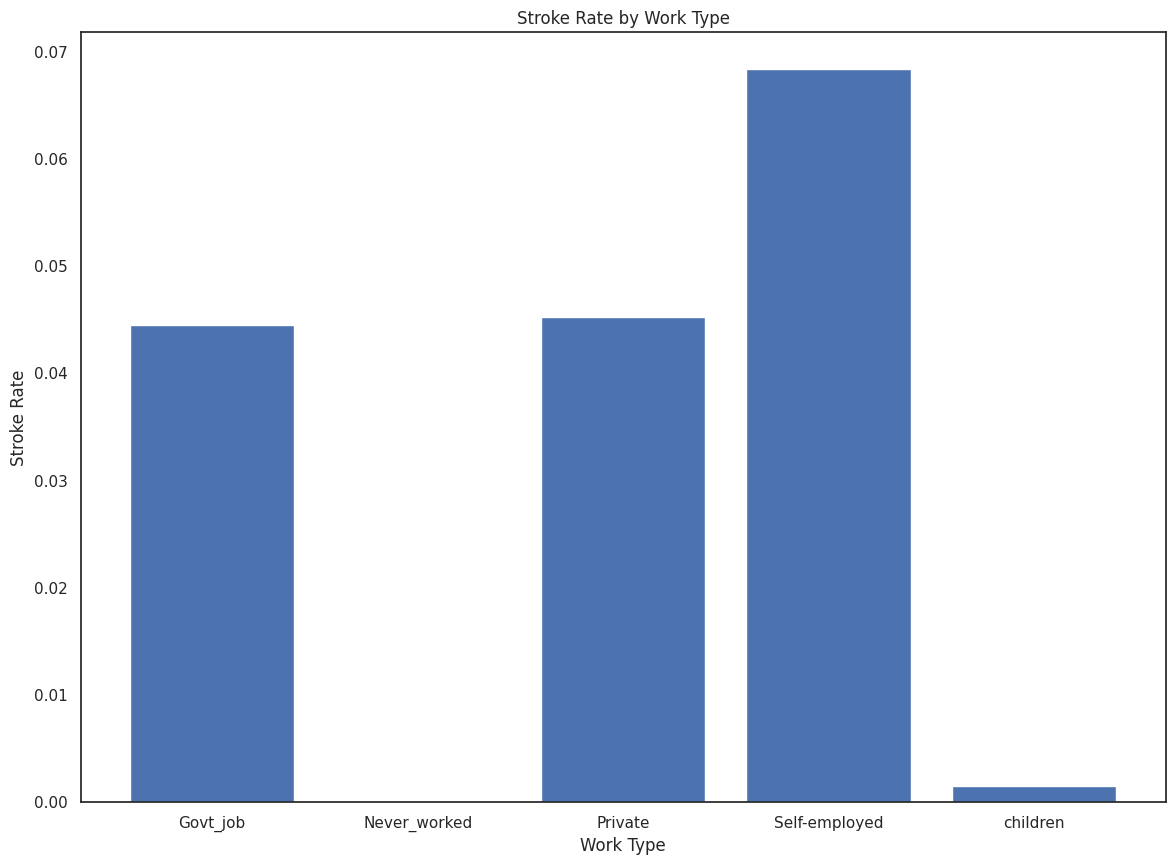

In [ ]:
groupedWorkType = df.groupby(by = 'work_type')

strokeRate = groupedWorkType.stroke.mean()

plt.bar(strokeRate.index, strokeRate.values)
plt.xlabel('Work Type')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rate by Work Type')
plt.show()

This graph was utilized to check how work type influenced stroke rates if at all. The only thing we could glean from this was that individuals who had never worked, mostly younger individuals, had virtually no strokes. Also that self-employed people had very high stroke rates, maybe pointing to stress if that could be understood to be related to self-employment.

This idea was tested in the below graph and we found supporting evidence.

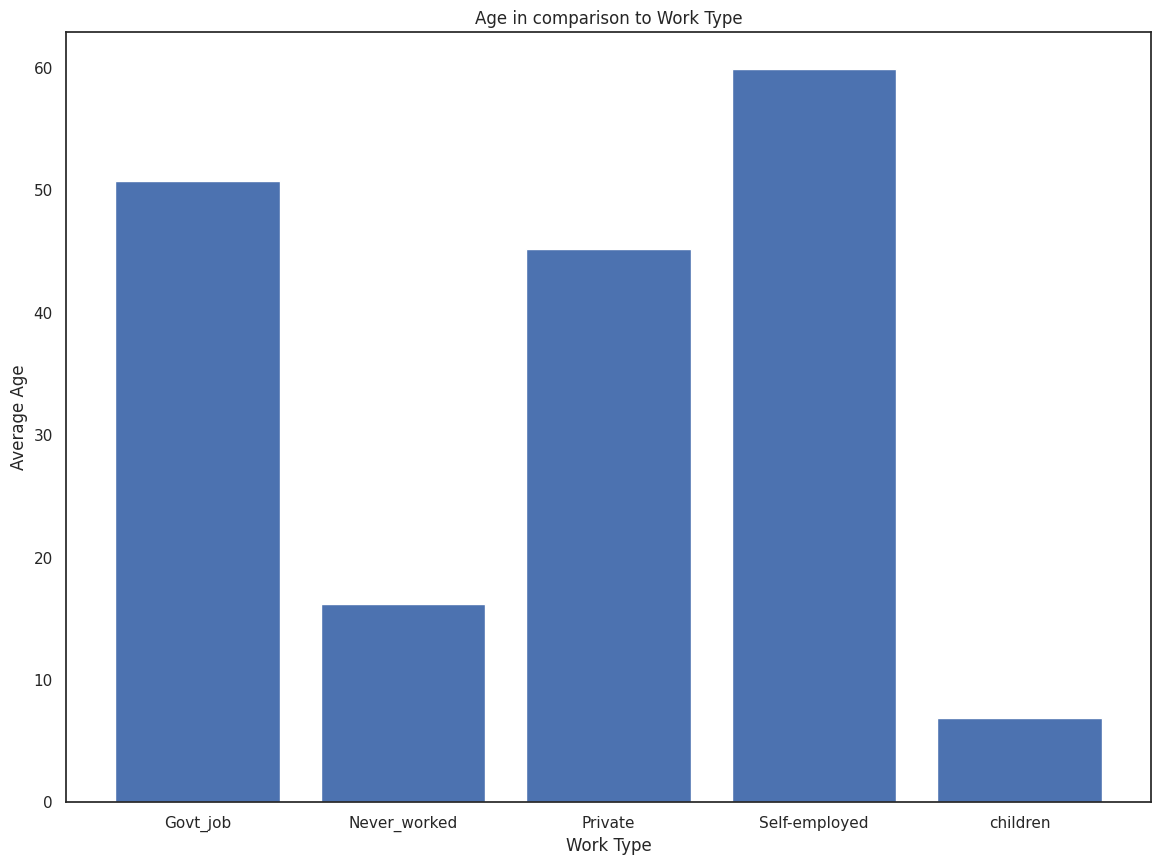

In [ ]:
groupedWorkType = df.groupby(by = 'work_type')

averageAge = groupedWorkType.age.mean()

plt.bar(strokeRate.index, averageAge.values)
plt.xlabel('Work Type')
plt.ylabel('Average Age')
plt.title('Age in comparison to Work Type')
plt.show()

#4.0 Dimensionality Reduction & Data Projection Utilizing UMAP

---



For the final point, beyond trying our best throughout the project, we also decided to try our hand at dimensionality reduction and UMAP projection as seen below.

In [ ]:
import umap.umap_ as umap
reducer = umap.UMAP()
df = df.dropna()
stroke_data = df[ [ "age", "bmi", "avg_glucose_level", "heart_disease", "gender", "hypertension"] ].values

scaled_stroke_data = StandardScaler().fit_transform(stroke_data)
scaled_stroke_data.shape

(4908, 6)

First we set up the import necessary and chose the relevant features that we wish to utilize for the UMAP projection. We then address the issue that these measure things on different scales and thus, convert each feature into z-scores for comparability.

In [ ]:
embedding = reducer.fit_transform(scaled_stroke_data)
embedding.shape

(4908, 2)

We then train the reducer in relation to our data and make use of the fit transform function which first calls the fit function and then transforms the results into a numpy array for our use. We use a .shape() function in both code blocks to show the reduction of the dimensionality of our data.

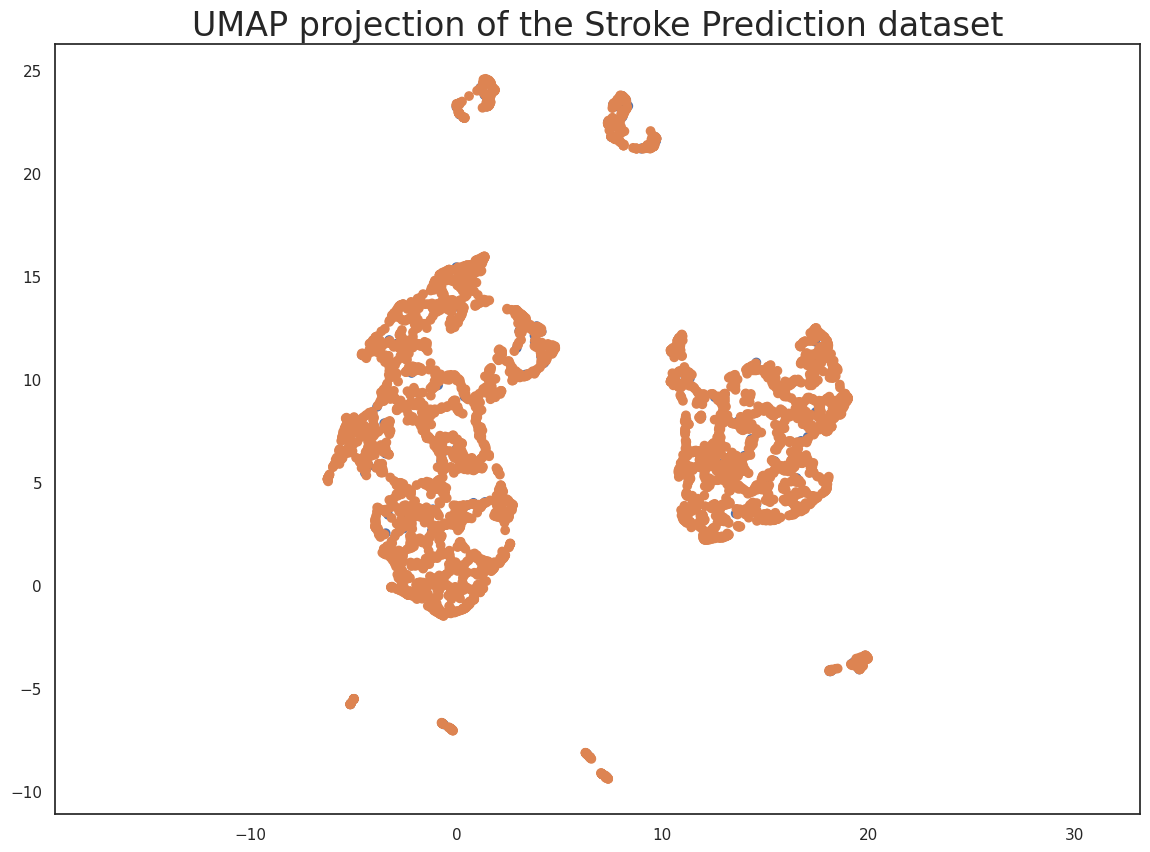

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    # c=[sns.color_palette()[x] for x in df.smoking_status.map({"unknown":0, "formerly smoked":1, "never smoked":2, "smokes":3})])
    c=[sns.color_palette()[x] for x in df.stroke.map({0: 1, 1: 0})])

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Stroke Prediction dataset', fontsize=24);

Lastly we actually make use of a UMAP projection, unfortunately, as can be seen in the projection, the UMAP projection shows very little information. Despite testing with the use of different and varied amounts of features for the reduction and then projection the large groupings of individuals who have not had strokes greatly outweighs the entries of those who did and overlaps over them making the stroke entries barely visible. While some entries can be seen on the fringes of the projection this is by no means enough to gain any extra understanding.

There may be some extra step we could have taken or some understanding we don't yet have that could take this projection a step further but even in communicating with other groups it seems as though the UMAP is very good in some scenarios, as in examples we see online, but few of us feel as though we have made a good use of the tool.

- Understanding UMAP projections

In our reading from the provided links and from some outside articles we have come to understand that UMAP usese graph layout algorithms to arrange inputed data into low dimensional space. Essentially, as we understand it the technique studies the high dimensional connectivity in the provided dataset and then reconstructs a much low dimensionality rendering while staying as true as it can to the original dataset.

This means that it reduces dimensionality, a powerful tool as we have studied in class, and does this efficiently while still maintaining a high degree of accuracy.

This can be better understood by investigating its set goals of preserving local structure and achieving global coherence. A summarization of the last point but one which uses higher level words which in our opinion make more sense in this context. With this understanding and a short skim through this article:

https://pair-code.github.io/understanding-umap/#:~:text=UMAP%2C%20at%20its%20core%2C%20works,as%20structurally%20similar%20as%20possible.

To look at how some of these steps are done we have a pretty good understanding of the projection and hope to utilize more effectively in the future.